In [175]:
import numpy as np 
import pandas as pd 

datafile = 'moon.xlsx'
data = pd.read_excel(datafile)
data.head(20)

,Label,Stage,Luminal,Risk,Age,Menopause,MBNG,T,N,M,ER,PR,Her2,Ki67,Infiltration
0,0,2,1,2,2,0,3,2,1,0,1,1,1,1,0
1,0,1,2,2,2,0,2,1,0,0,1,1,1,2,0
2,0,2,1,2,3,0,2,1,1,0,1,1,1,1,1
3,1,3,4,3,3,1,3,2,3,0,0,0,3,2,1
4,0,2,5,2,3,1,3,2,0,0,0,0,1,2,0
5,0,2,5,3,2,0,3,1,1,0,0,0,1,2,0
6,0,3,2,3,2,0,2,4,3,0,1,0,1,2,1
7,0,1,1,1,2,0,1,1,0,0,1,1,1,1,0
8,0,2,4,3,2,0,3,1,1,0,0,0,3,2,0
9,1,3,5,3,2,0,3,3,3,0,0,0,2,2,1


In [176]:
kerasdata = pd.DataFrame()
kerasdata = pd.concat([kerasdata, data['Label']],axis = 1) 

In [177]:
for colname in data.columns:
    if colname != 'Label':
        df = pd.get_dummies(data[colname])
        df.columns = [colname + '-' + str(name) for name in df.columns ]
        kerasdata = pd.concat([kerasdata,df],axis = 1)

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 42
testsize = 0.1
kfold = StratifiedKFold(n_splits=10, random_state =seed, shuffle=True)
X, y = kerasdata.values[:,1:], kerasdata.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=seed)

In [179]:
X_train.shape

(364, 42)

In [180]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape=(42,)))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 20)                860       
_________________________________________________________________
dense_82 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_83 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_84 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_85 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_86 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_87 (Dense)             (None, 10)              

In [181]:
history = model.fit(X_train,y_train,
                    batch_size= 64,
                    epochs= 150,
                    validation_split=0.1 #分割一部分训练数据用于验证
                   )

Train on 327 samples, validate on 37 samples
Epoch 1/150
327/327 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.7462 - val_loss: 0.6797 - val_accuracy: 0.6216
Epoch 2/150
327/327 [==============================] - 0s 70us/step - loss: 0.6622 - accuracy: 0.7492 - val_loss: 0.6653 - val_accuracy: 0.6216
Epoch 3/150
327/327 [==============================] - 0s 73us/step - loss: 0.6332 - accuracy: 0.7492 - val_loss: 0.6519 - val_accuracy: 0.6216
Epoch 4/150
327/327 [==============================] - 0s 67us/step - loss: 0.6031 - accuracy: 0.7492 - val_loss: 0.6427 - val_accuracy: 0.6216
Epoch 5/150
327/327 [==============================] - 0s 58us/step - loss: 0.5740 - accuracy: 0.7492 - val_loss: 0.6419 - val_accuracy: 0.6216
Epoch 6/150
327/327 [==============================] - 0s 55us/step - loss: 0.5526 - accuracy: 0.7492 - val_loss: 0.6369 - val_accuracy: 0.6216
Epoch 7/150
327/327 [==============================] - 0s 67us/step - loss: 0.5399 - accurac

Epoch 57/150
327/327 [==============================] - 0s 46us/step - loss: 0.0896 - accuracy: 0.9725 - val_loss: 0.4705 - val_accuracy: 0.8649
Epoch 58/150
327/327 [==============================] - 0s 49us/step - loss: 0.0989 - accuracy: 0.9633 - val_loss: 0.4830 - val_accuracy: 0.8919
Epoch 59/150
327/327 [==============================] - 0s 49us/step - loss: 0.1100 - accuracy: 0.9633 - val_loss: 0.5085 - val_accuracy: 0.8378
Epoch 60/150
327/327 [==============================] - 0s 55us/step - loss: 0.1008 - accuracy: 0.9664 - val_loss: 0.5059 - val_accuracy: 0.8378
Epoch 61/150
327/327 [==============================] - 0s 61us/step - loss: 0.0906 - accuracy: 0.9602 - val_loss: 0.4673 - val_accuracy: 0.8919
Epoch 62/150
327/327 [==============================] - 0s 61us/step - loss: 0.0914 - accuracy: 0.9755 - val_loss: 0.4918 - val_accuracy: 0.8919
Epoch 63/150
327/327 [==============================] - 0s 55us/step - loss: 0.0837 - accuracy: 0.9786 - val_loss: 0.5011 - val_ac

327/327 [==============================] - 0s 40us/step - loss: 0.0595 - accuracy: 0.9755 - val_loss: 0.6570 - val_accuracy: 0.8919
Epoch 114/150
327/327 [==============================] - 0s 55us/step - loss: 0.0506 - accuracy: 0.9786 - val_loss: 0.6509 - val_accuracy: 0.9189
Epoch 115/150
327/327 [==============================] - 0s 49us/step - loss: 0.0533 - accuracy: 0.9786 - val_loss: 0.6708 - val_accuracy: 0.9189
Epoch 116/150
327/327 [==============================] - 0s 49us/step - loss: 0.0479 - accuracy: 0.9817 - val_loss: 0.7168 - val_accuracy: 0.8919
Epoch 117/150
327/327 [==============================] - 0s 49us/step - loss: 0.0471 - accuracy: 0.9817 - val_loss: 0.7283 - val_accuracy: 0.8919
Epoch 118/150
327/327 [==============================] - 0s 52us/step - loss: 0.0465 - accuracy: 0.9817 - val_loss: 0.7338 - val_accuracy: 0.8649
Epoch 119/150
327/327 [==============================] - 0s 55us/step - loss: 0.0474 - accuracy: 0.9817 - val_loss: 0.7510 - val_accuracy:

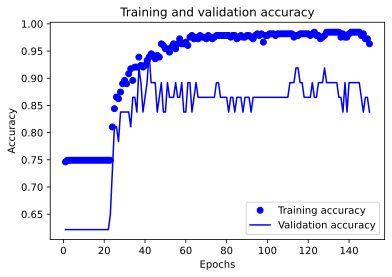

In [182]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [183]:
y_pred = model.predict_classes(X_test)

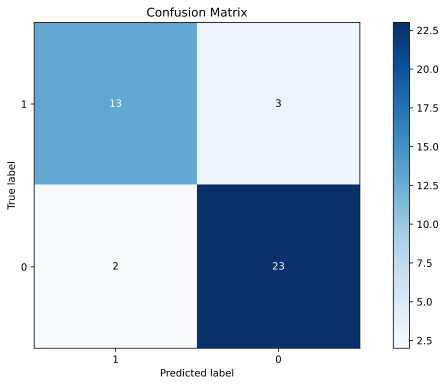

In [184]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[1,0], figsize=(12,6));